In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/train"

In [ ]:
test_dir = "/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test"

In [ ]:
train_data = ImageDataGenerator().flow_from_directory(train_dir,(150,150),batch_size=5,shuffle=False)

Found 8822 images belonging to 4 classes.


In [ ]:
test_data = ImageDataGenerator().flow_from_directory(test_dir,(150,150),batch_size=5,shuffle=False)

Found 2494 images belonging to 4 classes.


In [60]:
from keras.models import Sequential

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

In [70]:
model = Sequential()

In [71]:
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [72]:
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [73]:
model.add(Flatten())

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 36, 36, 32)       

In [75]:
model.add(Dense(4,activation="softmax"))

In [76]:
pred = model.predict(test_data)

499/499 [==============================] - 41s 82ms/step


In [77]:
import numpy as np
pred = np.argmax(pred,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes,pred)

#for covu 2D 32

In [78]:
accuracy = (cm[2, 2] + cm[3, 3]) / np.sum(np.sum(cm))
print("accuracy is", accuracy)


accuracy is 0.15437048917401763


In [65]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [64]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

In [ ]:
model.add(Dense(4,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [21]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
h = model.fit(train_data,batch_size=5,epochs=5)

Epoch 1/5
1765/1765 [==============================] - 4291s 2s/step - loss: 2.6378 - accuracy: 0.8169
Epoch 2/5
1765/1765 [==============================] - 440s 249ms/step - loss: 0.1603 - accuracy: 0.9467
Epoch 3/5
1765/1765 [==============================] - 439s 249ms/step - loss: 0.1267 - accuracy: 0.9636
Epoch 4/5
1765/1765 [==============================] - 434s 246ms/step - loss: 0.0557 - accuracy: 0.9833
Epoch 5/5
1765/1765 [==============================] - 430s 244ms/step - loss: 0.1282 - accuracy: 0.9768


In [22]:
import matplotlib.pyplot as plt

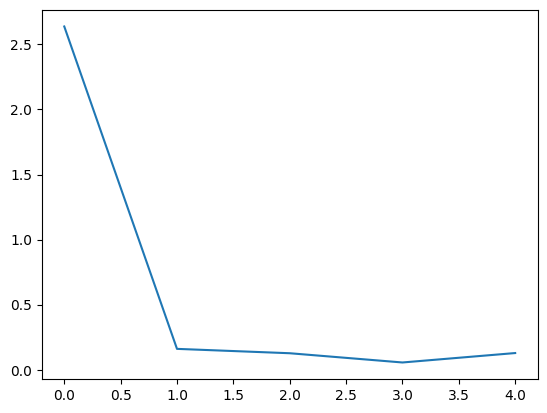

In [23]:
plt.plot(h.history["loss"])

In [25]:
model.evaluate(test_data)

499/499 [==============================] - 65s 130ms/step - loss: 0.0344 - accuracy: 0.9924


[0.03437121957540512, 0.9923816919326782]

In [26]:
pred = model.predict(test_data)

499/499 [==============================] - 45s 90ms/step


In [27]:
pred

array([[1.0000000e+00, 1.6709317e-16, 1.7649593e-13, 2.8717285e-12],
       [1.0000000e+00, 1.4812350e-14, 3.8396472e-27, 1.6907619e-18],
       [1.0000000e+00, 5.5295840e-13, 6.3675960e-17, 9.2766933e-14],
       ...,
       [1.0996678e-09, 1.7268371e-11, 3.4967900e-13, 1.0000000e+00],
       [6.6747377e-09, 6.4348880e-11, 4.1828849e-12, 1.0000000e+00],
       [4.6859324e-08, 1.0063128e-10, 4.8312873e-12, 1.0000000e+00]],
      dtype=float32)

In [28]:
import numpy as np
pred = np.argmax(pred,axis=1)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes,pred)

In [30]:
pred

array([0, 0, 0, ..., 3, 3, 3])

In [31]:
cm

array([[ 727,    0,    0,   16],
       [   0, 1014,    0,    3],
       [   0,    0,  277,    0],
       [   0,    0,    0,  457]])

In [35]:
accuracy_all_classes = np.sum(np.diag(cm)) / np.sum(np.sum(cm))

In [34]:
accuracy = (cm[2, 2] + cm[3, 3]) / np.sum(np.sum(cm))
print("accuracy is", accuracy)


accuracy is 0.2943063352044908


In [36]:
print(accuracy_all_classes)

0.9923817161186849


In [37]:
pip install keras

In [38]:
pip install tensorflow

In [39]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.2 MB/s eta 0:00:00


In [40]:
import numpy as np
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image,ImageOps
model = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [41]:
import os

train_dir = "/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/train"

Y_train = []
X_train = []

label = 0
# 2 for loop, 1 for classes and 1 for images in the class
for i in os.listdir(train_dir): #for class
    for j in os.listdir(train_dir + "/" + i): # for images
        try:
            img = Image.open(train_dir + "/" + i + "/" + j)
            img = img.resize((150,150))
	#img = img.convert(“L”)
            img = ImageOps.colorize(img, black="black", white="white")
            img =model(images=img)
            img = img["pixel_values"]
            img = np.array(img)
            X_train.append(img.flatten()/255)
            Y_train.append(label)
        except Exception as e:
             print("error is ", e)
    label = label+1

Streaming output truncated to the last 5000 lines.
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
error is  
err

In [42]:
test_dir = "/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test"

Y_test = []
X_test = []

label = 0
# 2 for loop, 1 for classes and 1 for images in the class
for i in os.listdir(test_dir): #for class
    for j in os.listdir(test_dir + "/" + i): # for images
        try:
            print(test_dir + "/" + i + "/" + j)
            img = Image.open(test_dir + "/" + i + "/" + j)
            img = img.resize((150,150))
	#img = img.convert(“L”)
            img = ImageOps.colorize(img, black="black", white="white")
            img =model(images=img)
            img = img["pixel_values"]
            img = np.array(img)
            X_test.append(img.flatten()/255)
            Y_test.append(label)
        except Exception as e:
             print("error is ", e)
    label = label+1

/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test/Stone/Stone- (10).jpg
error is  
/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test/Stone/Stone- (1010).jpg
error is  
/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test/Stone/Stone- (1001).jpg
error is  
/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test/Stone/Stone- (101).jpg
error is  
/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test/Stone/Stone- (1003).jpg
error is  
/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test/Stone/Stone- (1019).jpg
error is  
/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test/Stone/Stone- (1033).jpg
error is  
/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test/Stone/Stone- (1025).jpg
error is  
/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/test/Stone/Stone- (1037).jpg
error is  
/content/drive/MyDrive/Colab Notebooks/kidney (split train

In [44]:

print((cm[2,2]+cm[3,3])/(sum(sum(cm))))

0.2943063352044908


In [46]:
accuracy = (cm[2, 2] + cm[3, 3]) / np.sum(np.sum(cm))
print (accuracy)

0.2943063352044908


In [48]:
accuracy_all_classes = np.sum(np.diag(cm)) / np.sum(np.sum(cm))
print(accuracy_all_classes)

0.9923817161186849


In [52]:
import cv2
import numpy as np
import os
# Libraries
import keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

IMG_SIZE = 100
photo_train = 300 # set 0 if no max
photo_test = 150

from tensorflow.keras.applications.resnet50 import ResNet50
model =   ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE,3))



94765736/94765736 [==============================] - 3s 0us/step


In [56]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/kidney (split train test)/train"

Y_train = []
X_train = []

label = 0
# 2 for loop, 1 for classes and 1 for images in the class
for i in os.listdir(train_dir): #for class
    for j in os.listdir(train_dir + "/" + i): # for images
        img=cv2.imread(train_dir + "/" + i + "/" + j)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        img = image.img_to_array(img)
        img = preprocess_input(np.expand_dims(img.copy(), axis=0))
        img = model.predict(img)
        X_train.append(img.flatten())
        Y_train.append(label)
        img_num = img_num + 1
    label = label+1

1/1 [==============================] - 0s 227ms/step


NameError: ignored

In [49]:
import joblib

In [50]:
model = joblib.load("/content/drive/MyDrive/Colab Notebooks/resnet.jl")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
